In [2]:
%run ../nn_option_pricer/_key_imports.py
import sys
sys.path.append("../")
from nn_option_pricer.bs import make_GBM_dataset

In [5]:
2 ** 14

16384

In [7]:
SEED = 42
T = 1
N_TIMES = 1
N_SAMPLES = 2 ** 14
param_space = {"log(S/K)": (0.5, 2),
          "sigma": (1e-1, 3)}
          

from pandas.util.testing import assert_frame_equal
assert_frame_equal(make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed = 42),
                   make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed = 42))

X_df = make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed = 42)
X_df.to_csv("bs_train.csv", index=False)

X_df_test = make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed = 2022)
X_df_test.to_csv("bs_test.csv", index=False)


display(X_df)

(16384, 3) (16384,)
(16384, 3) (16384,)
(16384, 3) (16384,)
(16384, 3) (16384,)


,log(S/K),ttm,sigma,pathwise_delta,call_payoff,call_true,digital_payoff,digital_true,true_d_log(S/K),true_d_ttm,true_d2_log(S/K),path
0,0.379784,1.433166,1.433166,0.000000,0.000000,0.897660,0,0.325783,1.223443,0.360269,1.474823,0
1,-0.084732,1.119242,1.119242,0.000000,0.000000,0.367456,0,0.262608,0.630063,0.326032,0.921361,1
2,0.497122,0.684590,0.684590,4.680539,1.163455,0.759996,1,0.649461,1.409457,0.370606,1.950812,2
3,0.273610,1.180268,1.180268,0.000000,0.000000,0.684409,0,0.360054,1.044463,0.374137,1.361457,3
4,-0.562590,1.988706,1.988706,0.000000,0.000000,0.333150,0,0.100758,0.433908,0.176468,0.522643,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16379,-0.208446,0.320463,0.320463,0.000000,0.000000,0.044513,0,0.208773,0.253287,0.287210,1.149518,16379
16380,0.691517,1.068798,1.068798,13.392622,2.659593,1.214857,1,0.544828,1.759686,0.396421,2.130589,16380
16381,-0.236623,2.309200,2.309200,0.000000,0.000000,0.569396,0,0.104364,0.673760,0.181038,0.752159,16381
16382,0.498751,0.834686,0.834686,0.000000,0.000000,0.819797,0,0.571498,1.391294,0.392518,1.861553,16382


Text(0.5, 1.0, 'True payoffs vs Monyness')

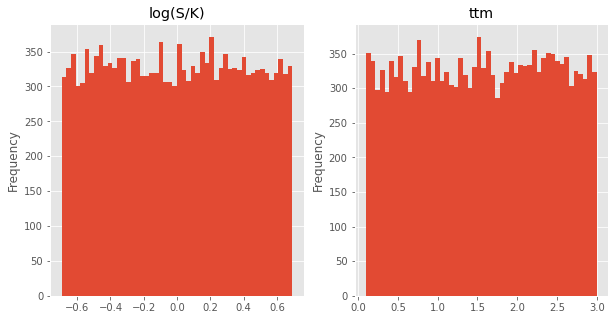

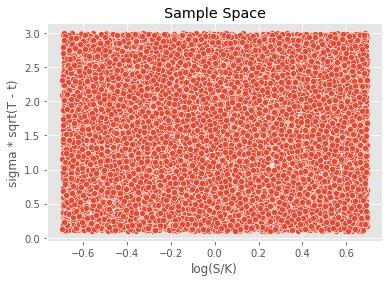

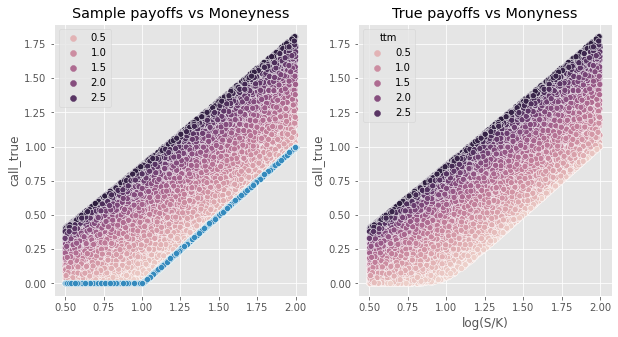

In [8]:
"""
Visualise data
"""
feat_names = ['log(S/K)', 'ttm']
Xs = X_df[feat_names].values
ys = X_df['call_true']
f_to_i = lambda x: feat_names.index(x)

# Marginal Distributions of Parameter Space
fig, ax = plt.subplots(figsize=(5 * len(feat_names), 5), ncols = len(feat_names))
for i in range(len(feat_names)):
    X_df.iloc[:, i].plot(kind = 'hist', ax = ax[i], bins = 50)
    ax[i].set_title(feat_names[i])
# Terminal Distribution of underlying
fig, ax = plt.subplots()
sns.scatterplot(x = Xs[:, f_to_i("log(S/K)")], y = Xs[:, f_to_i("ttm")], ax = ax)
ax.set_title("Sample Space")
ax.set_xlabel("log(S/K)")
ax.set_ylabel("sigma * sqrt(T - t)")
# sample payoff, intrinsic val v S/K

fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
intrinsic_val = np.maximum(np.exp(Xs[:,f_to_i("log(S/K)")]) - 1.0, 0)
sns.scatterplot(x = np.exp(Xs[:,f_to_i("log(S/K)")]), y = ys, hue = Xs[:, f_to_i("ttm")], ax = ax[0])
sns.scatterplot(x = np.exp(Xs[:,f_to_i("log(S/K)")]), y = intrinsic_val, ax = ax[0])
ax[0].set_title("Sample payoffs vs Moneyness")
sns.scatterplot(x = np.exp(X_df['log(S/K)']), y = X_df['call_true'], hue = X_df['ttm'], ax = ax[1])
ax[1].set_title("True payoffs vs Monyness")

In [9]:
true_pde_err = bs_log_pde_err(X_df['log(S/K)'], X_df['ttm'], 
                          X_df['true_d_ttm'], 
                          X_df['true_d_log(S/K)'], 
                          X_df['true_d2_log(S/K)'])
assert np.allclose(np.mean(true_pde_err), 0)

NameError: name 'bs_log_pde_err' is not defined